In [2]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

In [27]:
trackstates = uproot.open("../root/trackstates_gsf.root:trackstates")
print(trackstates.keys())

['event_nr', 'multiTraj_nr', 'subTraj_nr', 't_x', 't_y', 't_z', 't_r', 't_dx', 't_dy', 't_dz', 't_eLOC0', 't_eLOC1', 't_ePHI', 't_eTHETA', 't_eQOP', 't_eT', 'nStates', 'nMeasurements', 'volume_id', 'layer_id', 'module_id', 'pathLength', 'l_x_hit', 'l_y_hit', 'g_x_hit', 'g_y_hit', 'g_z_hit', 'res_x_hit', 'res_y_hit', 'err_x_hit', 'err_y_hit', 'pull_x_hit', 'pull_y_hit', 'dim_hit', 'nPredicted', 'predicted', 'eLOC0_prt', 'eLOC1_prt', 'ePHI_prt', 'eTHETA_prt', 'eQOP_prt', 'eT_prt', 'res_eLOC0_prt', 'res_eLOC1_prt', 'res_ePHI_prt', 'res_eTHETA_prt', 'res_eQOP_prt', 'res_eT_prt', 'err_eLOC0_prt', 'err_eLOC1_prt', 'err_ePHI_prt', 'err_eTHETA_prt', 'err_eQOP_prt', 'err_eT_prt', 'pull_eLOC0_prt', 'pull_eLOC1_prt', 'pull_ePHI_prt', 'pull_eTHETA_prt', 'pull_eQOP_prt', 'pull_eT_prt', 'g_x_prt', 'g_y_prt', 'g_z_prt', 'px_prt', 'py_prt', 'pz_prt', 'eta_prt', 'pT_prt', 'nFiltered', 'filtered', 'eLOC0_flt', 'eLOC1_flt', 'ePHI_flt', 'eTHETA_flt', 'eQOP_flt', 'eT_flt', 'res_eLOC0_flt', 'res_eLOC1_flt',

In [43]:
event = trackstates["event_nr"].array(library="np")
traj = trackstates["multiTraj_nr"].array(library="np")
traj.shape

(997,)

In [25]:
tracksummary = uproot.open("../root/tracksummary_gsf.root:tracksummary")
print(tracksummary.keys())

['event_nr', 'multiTraj_nr', 'subTraj_nr', 'nStates', 'nMeasurements', 'nOutliers', 'nHoles', 'nSharedHits', 'chi2Sum', 'NDF', 'measurementChi2', 'outlierChi2', 'measurementVolume', 'measurementLayer', 'outlierVolume', 'outlierLayer', 'nMajorityHits', 'majorityParticleId', 't_charge', 't_time', 't_vx', 't_vy', 't_vz', 't_px', 't_py', 't_pz', 't_theta', 't_phi', 't_eta', 't_p', 't_pT', 't_d0', 't_z0', 'hasFittedParams', 'eLOC0_fit', 'eLOC1_fit', 'ePHI_fit', 'eTHETA_fit', 'eQOP_fit', 'eT_fit', 'err_eLOC0_fit', 'err_eLOC1_fit', 'err_ePHI_fit', 'err_eTHETA_fit', 'err_eQOP_fit', 'err_eT_fit', 'res_eLOC0_fit', 'res_eLOC1_fit', 'res_ePHI_fit', 'res_eTHETA_fit', 'res_eQOP_fit', 'res_eT_fit', 'pull_eLOC0_fit', 'pull_eLOC1_fit', 'pull_ePHI_fit', 'pull_eTHETA_fit', 'pull_eQOP_fit', 'pull_eT_fit']


In [35]:
def get(key):
    if key == 'p_fit':
        return abs(1./get('eQOP_fit'))
    if key == "res_p_fit":
        return abs(1./get('eQOP_fit')) - get('t_p')
    if key == "true_p_loss":
        teqop = trackstates['t_eQOP'].array(library="np")
        return np.array([ 1./abs(a[0]) - 1./abs(a[-1]) for a in teqop ]) 
    else:
        return np.concatenate(tracksummary[key].array(library="np"))

#keys = ['p_fit', 't_pT', 't_eta', 't_phi', "chi2Sum", "nMeasurements", "nHoles", "nStates"]
keys = ["chi2Sum", 't_theta', 't_phi', 't_p', 'res_p_fit', 'true_p_loss']

data = np.vstack([ get(k) for k in keys ])
data.shape

(6, 997)

In [51]:
idxs_increase = np.nonzero(data[4] > 1)[0]

print("Energy increase:",", ".join(["(e={}, t={}, r={:.2f})".format(event[i], traj[i], data[4,i]) for i in idxs_increase ]))

Energy increase: (e=0, t=210, r=1.29), (e=0, t=237, r=1.20), (e=0, t=310, r=1.13), (e=0, t=494, r=1.02), (e=0, t=575, r=1.06), (e=0, t=603, r=1.19), (e=0, t=945, r=1.12), (e=0, t=947, r=1.02)


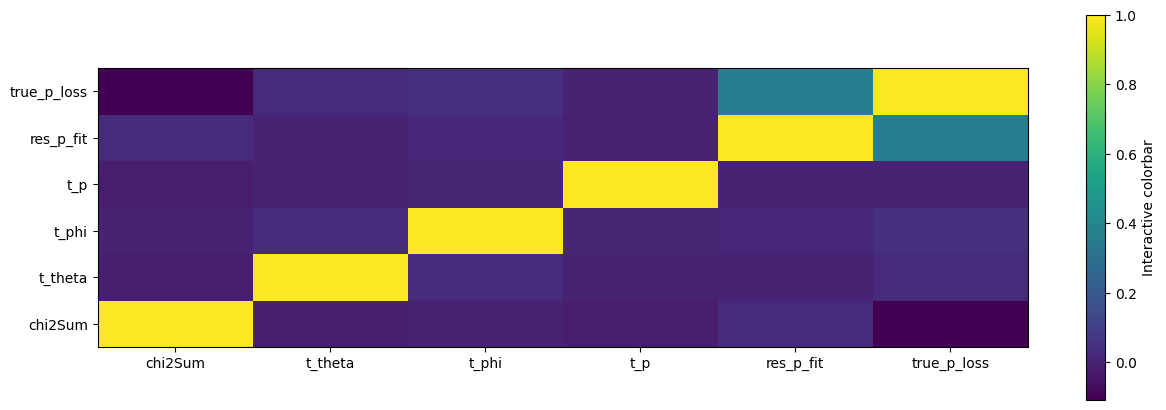

In [37]:
fig, ax = plt.subplots(figsize=(15,5))

im = plt.imshow(np.corrcoef(data), origin="lower", aspect=0.3)
fig.colorbar(im, ax=plt.gca(), label='Interactive colorbar')

ax.set_xticks(np.arange(len(keys)))
ax.set_yticks(np.arange(len(keys)))

ax.set_xticklabels(keys)
ax.set_yticklabels(keys)
print("")

In [38]:
def scatter_with_idx(idx_a, idx_b):
    plt.scatter(data[idx_a], data[idx_b])
    plt.xlabel(keys[idx_a])
    plt.ylabel(keys[idx_b])

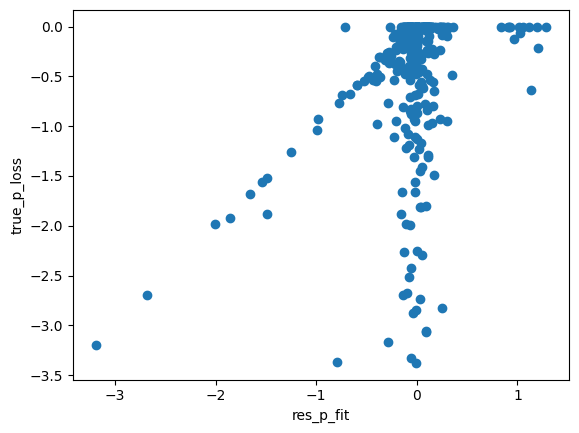

In [39]:
scatter_with_idx(4,5)